In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# Read Excel File of Survey from RT370 research
df = pd.read_excel('RT370.xlsx')
df

,Age,Gender,Country_Of_Origin,3_2_TEXT,Native_Language,4_3_TEXT,Education,Education_coded,5_12_TEXT,Job_Title,...,29b,29c,29d,29e,29f,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.0,Male,USA,NaN,English,NaN,Completed technical program,Some College or Technical Program,NaN,Craft Superintendent,...,2,Don't Know,Don't Know,Don't Know,Don't Know,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Agree
3,NaN,Male,USA,NaN,English,NaN,Associate degree (2-year program),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,0,3,1,0,Agree,Disagree,Agree,Agree,Agree
4,55.0,Male,NaN,NaN,English,NaN,GED equivalent \t,High School or Less,NaN,Apprentice/Helper,...,0,0,5,5,0,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,57.0,Male,USA,NaN,English,NaN,Other (please specify),Some College or Technical Program,Real estate licensing & USPAP appraisal schol,Other (please specify),...,1,0,0,6,0,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree
6669,32.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Foreman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6670,38.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Apprentice/Helper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6671,48.0,Male,USA,NaN,Spanish,NaN,Some college (No degree),Some College or Technical Program,NaN,Project Manager \t\t\t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read Excel File of Survey from General Social Survey Data
data_GSS=pd.read_excel('GSS.xlsx')
data_GSS

,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers,Gender1,Gender2
0,Disagree,Agree,Never,Rarely,Very true,Male,Male
1,Strongly agree,Strongly agree,Never,Never,Somewhat true,Female,Male
2,Agree,Agree,Often,Sometimes,Somewhat true,Female,Male
3,Strongly agree,Strongly agree,Sometimes,Sometimes,Somewhat true,Female,Female
4,Agree,Agree,Dont know,Don't know,Not too true,Male,Female
...,...,...,...,...,...,...,...
1235,Agree,Disagree,NaN,NaN,Somewhat true,Male,NaN
1236,Agree,Agree,NaN,NaN,Not at all true,Male,NaN
1237,Strongly agree,Disagree,NaN,NaN,Very true,Male,NaN
1238,Agree,Agree,NaN,NaN,Very true,Male,NaN


In [4]:
#Drop empty rows from the these 5 columns of focus in the analysis
data_culture = df.dropna(subset = ["Reliable_Coworkers","Derogatory_Comments","Treated_Unprofessionally","Productive","Respect"])
data_culture

,Age,Gender,Country_Of_Origin,3_2_TEXT,Native_Language,4_3_TEXT,Education,Education_coded,5_12_TEXT,Job_Title,...,29b,29c,29d,29e,29f,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
2,53.0,Male,USA,NaN,English,NaN,Completed technical program,Some College or Technical Program,NaN,Craft Superintendent,...,2,Don't Know,Don't Know,Don't Know,Don't Know,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Agree
3,NaN,Male,USA,NaN,English,NaN,Associate degree (2-year program),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,0,3,1,0,Agree,Disagree,Agree,Agree,Agree
4,55.0,Male,NaN,NaN,English,NaN,GED equivalent \t,High School or Less,NaN,Apprentice/Helper,...,0,0,5,5,0,Strongly agree,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree
5,27.0,Male,Other (Please Specify),Honduras,Spanish,NaN,High school diploma\t,High School or Less,NaN,Foreman,...,0,1,2,0,0,Strongly agree,Agree,Disagree,Disagree,Agree
6,31.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Foreman,...,0,2,1,4,0,Strongly agree,Agree,Strongly disagree,Strongly disagree,Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,48.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,8,0,5,0,Agree,Disagree,Disagree,Disagree,Agree
6665,44.0,Male,USA,NaN,English,NaN,High school diploma\t,High School or Less,NaN,Craftsperson / Journeyman,...,0,2,5,3,0,Agree,Agree,Disagree,Disagree,Disagree
6666,48.0,Male,USA,NaN,English,NaN,Associate degree (2-year program),Some College or Technical Program,NaN,Foreman,...,0,0,1,7,0,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree
6668,57.0,Male,USA,NaN,English,NaN,Other (please specify),Some College or Technical Program,Real estate licensing & USPAP appraisal schol,Other (please specify),...,1,0,0,6,0,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree


In [5]:
# This is a function that recodes the likert scale to a scale from 1 to 5
def recode_culture(x): 
    if x == 'Strongly disagree' or x == 'Never' or x == 'Not at all true': 
        return 1
    elif x == 'Disagree' or x == 'Rarely' or x == 'Not too true': 
        return 2
    elif x == "Don't Know" or x == 'Dont know': 
        return 3    
    elif x == 'Agree' or x == 'Sometimes' or x == 'Somewhat true': 
        return 4
    elif x == 'Strongly agree' or x == 'Often' or x == 'Very true': 
        return 5
    else: 
        return None

In [6]:
# Apply the recoding on the 'Respect' Column
data_culture['Respect'] = data_culture['Respect'].apply(recode_culture)
data_culture['Respect'].value_counts()

<ipython-input-6-090d2ece9d09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Respect'] = data_culture['Respect'].apply(recode_culture)


4    1252
5    1216
2     160
3      62
1      50
Name: Respect, dtype: int64

In [7]:
# Apply the recoding on the 'Productive' Column
data_culture['Productive'] = data_culture['Productive'].apply(recode_culture)
data_culture['Productive'].value_counts()

<ipython-input-7-0a41272ab9ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Productive'] = data_culture['Productive'].apply(recode_culture)


4    1416
5     789
2     408
1      93
3      34
Name: Productive, dtype: int64

In [8]:
# Apply the recoding on the 'Treated_Unprofessionally' Column
data_culture['Treated_Unprofessionally'] = data_culture['Treated_Unprofessionally'].apply(recode_culture)
data_culture['Treated_Unprofessionally'].value_counts()

<ipython-input-8-f58e6c2e2858>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Treated_Unprofessionally'] = data_culture['Treated_Unprofessionally'].apply(recode_culture)


1    1432
2     857
4     269
5     102
3      80
Name: Treated_Unprofessionally, dtype: int64

In [9]:
# Apply the recoding on the 'Derogatory_Comments' Column
data_culture['Derogatory_Comments'] = data_culture['Derogatory_Comments'].apply(recode_culture)
data_culture['Derogatory_Comments'].value_counts()

<ipython-input-9-ed145a7ce868>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Derogatory_Comments'] = data_culture['Derogatory_Comments'].apply(recode_culture)


1    1192
2     777
4     444
3     191
5     136
Name: Derogatory_Comments, dtype: int64

In [10]:
# Apply the recoding on the 'Reliable Coworkers' Column
data_culture['Reliable_Coworkers'] = data_culture['Reliable_Coworkers'].apply(recode_culture)
data_culture['Reliable_Coworkers'].value_counts()

<ipython-input-10-34b084b19636>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Reliable_Coworkers'] = data_culture['Reliable_Coworkers'].apply(recode_culture)


4    1382
5    1146
2     128
3      46
1      38
Name: Reliable_Coworkers, dtype: int64

In [11]:
data_culture

,Age,Gender,Country_Of_Origin,3_2_TEXT,Native_Language,4_3_TEXT,Education,Education_coded,5_12_TEXT,Job_Title,...,29b,29c,29d,29e,29f,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
2,53.0,Male,USA,NaN,English,NaN,Completed technical program,Some College or Technical Program,NaN,Craft Superintendent,...,2,Don't Know,Don't Know,Don't Know,Don't Know,5,1,1,1,4
3,NaN,Male,USA,NaN,English,NaN,Associate degree (2-year program),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,0,3,1,0,4,2,4,4,4
4,55.0,Male,NaN,NaN,English,NaN,GED equivalent \t,High School or Less,NaN,Apprentice/Helper,...,0,0,5,5,0,5,5,1,1,5
5,27.0,Male,Other (Please Specify),Honduras,Spanish,NaN,High school diploma\t,High School or Less,NaN,Foreman,...,0,1,2,0,0,5,4,2,2,4
6,31.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Foreman,...,0,2,1,4,0,5,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,48.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,8,0,5,0,4,2,2,2,4
6665,44.0,Male,USA,NaN,English,NaN,High school diploma\t,High School or Less,NaN,Craftsperson / Journeyman,...,0,2,5,3,0,4,4,2,2,2
6666,48.0,Male,USA,NaN,English,NaN,Associate degree (2-year program),Some College or Technical Program,NaN,Foreman,...,0,0,1,7,0,5,5,1,4,4
6668,57.0,Male,USA,NaN,English,NaN,Other (please specify),Some College or Technical Program,Real estate licensing & USPAP appraisal schol,Other (please specify),...,1,0,0,6,0,5,5,1,4,4


In [12]:
# Apply the recoding on the 'Respect' Column in GSS data set
data_GSS['Respect'] = data_GSS['Respect'].apply(recode_culture)
data_GSS['Respect'].value_counts()

4    701
5    441
2     77
1     21
Name: Respect, dtype: int64

In [13]:
# Apply the recoding on the 'Productive' Column in GSS data set
data_GSS['Productive'] = data_GSS['Productive'].apply(recode_culture)
data_GSS['Productive'].value_counts()

4    749
5    351
2    120
1     17
3      3
Name: Productive, dtype: int64

In [14]:
# Apply the recoding on the 'Treated_Unprofessionally' Column in GSS data set
data_GSS['Treated_Unprofessionally'] = data_GSS['Treated_Unprofessionally'].apply(recode_culture)
data_GSS['Treated_Unprofessionally'].value_counts()

1.0    645
2.0    315
4.0    134
5.0     38
3.0     14
Name: Treated_Unprofessionally, dtype: int64

In [15]:
# Apply the recoding on the 'Derogatory_Comments' Column in GSS data set
data_GSS['Derogatory_Comments'] = data_GSS['Derogatory_Comments'].apply(recode_culture)
data_GSS['Derogatory_Comments'].value_counts()

1.0    819
2.0    180
4.0     95
5.0     30
Name: Derogatory_Comments, dtype: int64

In [16]:
# Apply the recoding on the 'Reliable_Coworkers' Column in GSS data set
data_GSS['Reliable_Coworkers'] = data_GSS['Reliable_Coworkers'].apply(recode_culture)
data_GSS['Reliable_Coworkers'].value_counts()

5    646
4    463
2     79
1     45
3      7
Name: Reliable_Coworkers, dtype: int64

In [17]:
data_GSS

,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers,Gender1,Gender2
0,2,4,1.0,2.0,5,Male,Male
1,5,5,1.0,1.0,4,Female,Male
2,4,4,5.0,4.0,4,Female,Male
3,5,5,4.0,4.0,4,Female,Female
4,4,4,3.0,NaN,2,Male,Female
...,...,...,...,...,...,...,...
1235,4,2,NaN,NaN,4,Male,NaN
1236,4,4,NaN,NaN,1,Male,NaN
1237,5,2,NaN,NaN,5,Male,NaN
1238,4,4,NaN,NaN,5,Male,NaN


In [18]:
#Group by Gender the average of the data in the 'Respect' Column in the RT370 dataset
Respect_Gender=data_culture['Respect'].groupby(data_culture['Gender']).mean().to_frame(name='Respect')
Respect_Gender

,Respect
Gender,
Female,3.789855
Male,4.275407
Other,3.571429


In [19]:
#Group by Gender the average of the data in the 'Productive' Column in the RT370 dataset
Productive_Gender=data_culture['Productive'].groupby(data_culture['Gender']).mean().to_frame(name='Productive')
Productive_Gender

,Productive
Gender,
Female,3.326087
Male,3.908844
Other,2.857143


In [20]:
#Group by Gender the average of the data in the 'Treated_Unprofessionally' Column in the RT370 dataset
Treated_Unprofessionally_Gender=data_culture['Treated_Unprofessionally'].groupby(data_culture['Gender']).mean().to_frame(name='Treated_Unprofessionally')
Treated_Unprofessionally_Gender

,Treated_Unprofessionally
Gender,
Female,2.500000
Male,1.777735
Other,2.000000


In [21]:
#Group by Gender the average of the data in the 'Derogatory_Comments' Column in the RT370 dataset
Derogatory_Comments_Gender=data_culture['Derogatory_Comments'].groupby(data_culture['Gender']).mean().to_frame(name='Derogatory_Comments')
Derogatory_Comments_Gender

,Derogatory_Comments
Gender,
Female,2.949275
Male,2.060124
Other,2.857143


In [22]:
#Group by Gender the average of the data in the 'Reliable_Coworkers' Column in the RT370 dataset
Reliable_Coworkers_Gender=data_culture['Reliable_Coworkers'].groupby(data_culture['Gender']).mean().to_frame(name='Reliable_Coworkers')
Reliable_Coworkers_Gender

,Reliable_Coworkers
Gender,
Female,4.007246
Male,4.280838
Other,3.714286


In [23]:
#Merge the 'Respect' and 'Productive' column
data_culture_Gender1 = pd.merge(Respect_Gender, Productive_Gender, on='Gender', how = 'inner')
data_culture_Gender1

,Respect,Productive
Gender,,
Female,3.789855,3.326087
Male,4.275407,3.908844
Other,3.571429,2.857143


In [24]:
#Merge the 'Treated_Unprofessionally' and 'Derogatory_Comments' column
data_culture_Gender2 = pd.merge(Treated_Unprofessionally_Gender, Derogatory_Comments_Gender, on='Gender', how = 'inner')
data_culture_Gender2

,Treated_Unprofessionally,Derogatory_Comments
Gender,,
Female,2.500000,2.949275
Male,1.777735,2.060124
Other,2.000000,2.857143


In [25]:
#Merge the two two previous merged dataframes
data_culture_Gender3 = pd.merge(data_culture_Gender1, data_culture_Gender2, on='Gender', how = 'inner')
data_culture_Gender3

,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments
Gender,,,,
Female,3.789855,3.326087,2.500000,2.949275
Male,4.275407,3.908844,1.777735,2.060124
Other,3.571429,2.857143,2.000000,2.857143


In [26]:
#Merge the previous merged dataset with 'Reliable_Coworkers' dataset
data_culture_Gender = pd.merge(data_culture_Gender3, Reliable_Coworkers_Gender, on='Gender', how = 'inner')
data_culture_Gender

,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
Gender,,,,,
Female,3.789855,3.326087,2.500000,2.949275,4.007246
Male,4.275407,3.908844,1.777735,2.060124,4.280838
Other,3.571429,2.857143,2.000000,2.857143,3.714286


In [27]:
#Dataset of Males only
data_culture_male=data_culture[data_culture['Gender']=='Male']
data_culture_male

,Age,Gender,Country_Of_Origin,3_2_TEXT,Native_Language,4_3_TEXT,Education,Education_coded,5_12_TEXT,Job_Title,...,29b,29c,29d,29e,29f,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
2,53.0,Male,USA,NaN,English,NaN,Completed technical program,Some College or Technical Program,NaN,Craft Superintendent,...,2,Don't Know,Don't Know,Don't Know,Don't Know,5,1,1,1,4
3,NaN,Male,USA,NaN,English,NaN,Associate degree (2-year program),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,0,3,1,0,4,2,4,4,4
4,55.0,Male,NaN,NaN,English,NaN,GED equivalent \t,High School or Less,NaN,Apprentice/Helper,...,0,0,5,5,0,5,5,1,1,5
5,27.0,Male,Other (Please Specify),Honduras,Spanish,NaN,High school diploma\t,High School or Less,NaN,Foreman,...,0,1,2,0,0,5,4,2,2,4
6,31.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Foreman,...,0,2,1,4,0,5,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,48.0,Male,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,8,0,5,0,4,2,2,2,4
6665,44.0,Male,USA,NaN,English,NaN,High school diploma\t,High School or Less,NaN,Craftsperson / Journeyman,...,0,2,5,3,0,4,4,2,2,2
6666,48.0,Male,USA,NaN,English,NaN,Associate degree (2-year program),Some College or Technical Program,NaN,Foreman,...,0,0,1,7,0,5,5,1,4,4
6668,57.0,Male,USA,NaN,English,NaN,Other (please specify),Some College or Technical Program,Real estate licensing & USPAP appraisal schol,Other (please specify),...,1,0,0,6,0,5,5,1,4,4


In [28]:
#Dataset of Females only
data_culture_female=data_culture[data_culture['Gender']=='Female']
data_culture_female

,Age,Gender,Country_Of_Origin,3_2_TEXT,Native_Language,4_3_TEXT,Education,Education_coded,5_12_TEXT,Job_Title,...,29b,29c,29d,29e,29f,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
19,29.0,Female,USA,NaN,English,NaN,Bachelor’s degree (4-year program),Bachelor or Higher,NaN,Other (please specify),...,0,2,0,8,0,4,2,2,4,4
31,NaN,Female,USA,NaN,English,NaN,"Some post graduate education (Masters, Ph.D.)",Bachelor or Higher,NaN,Project Manager \t\t\t,...,0,6,4,4,0,4,2,2,4,2
42,21.0,Female,USA,NaN,English,NaN,Bachelor’s degree (4-year program),Bachelor or Higher,NaN,Other (please specify),...,NaN,NaN,NaN,NaN,NaN,4,4,2,4,5
47,40.0,Female,USA,NaN,English,NaN,GED equivalent \t,High School or Less,NaN,Apprentice/Helper,...,1,2,2,1,0,5,5,1,1,5
65,51.0,Female,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Other (please specify),...,NaN,NaN,NaN,NaN,NaN,5,5,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,61.0,Female,USA,NaN,English,NaN,Some college (No degree),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,5,4,2,2,4
6510,55.0,Female,NaN,NaN,English,NaN,High school diploma\t,High School or Less,NaN,Craftsperson / Journeyman,...,1,0,0,6,0,4,4,1,1,5
6533,35.0,Female,NaN,NaN,English,NaN,Bachelor’s degree (4-year program),Bachelor or Higher,NaN,Apprentice/Helper,...,1,0,0,3,0,4,4,1,1,4
6582,44.0,Female,USA,NaN,Spanish,NaN,Some college (No degree),Some College or Technical Program,NaN,Craftsperson / Journeyman,...,0,1,3,1,0,5,2,4,2,5


In [29]:
#Transpose the grouped by Gender averaged of results
data_culture_Gender=data_culture_Gender.T
data_culture_Gender

Gender,Female,Male,Other
Respect,3.789855,4.275407,3.571429
Productive,3.326087,3.908844,2.857143
Treated_Unprofessionally,2.500000,1.777735,2.000000
Derogatory_Comments,2.949275,2.060124,2.857143
Reliable_Coworkers,4.007246,4.280838,3.714286


In [30]:
#Drop the Other Category from the 'data_culture_Gender' dataframe
data_culture_Gender=data_culture_Gender.drop(columns=['Other'])
data_culture_Gender

Gender,Female,Male
Respect,3.789855,4.275407
Productive,3.326087,3.908844
Treated_Unprofessionally,2.500000,1.777735
Derogatory_Comments,2.949275,2.060124
Reliable_Coworkers,4.007246,4.280838


In [31]:
#Calculate the difference in the average between Females and Males
data_culture_Gender['Difference']=data_culture_Gender['Female']-data_culture_Gender['Male']

In [32]:
data_culture_Gender

Gender,Female,Male,Difference
Respect,3.789855,4.275407,-0.485552
Productive,3.326087,3.908844,-0.582757
Treated_Unprofessionally,2.500000,1.777735,0.722265
Derogatory_Comments,2.949275,2.060124,0.889151
Reliable_Coworkers,4.007246,4.280838,-0.273591


In [33]:
#Create two empty columns, one for P-value and for to explain the significance of the results
data_culture_Gender['P_Value']=''
data_culture_Gender['Significance']=''

In [34]:
data_culture_Gender

Gender,Female,Male,Difference,P_Value,Significance
Respect,3.789855,4.275407,-0.485552,,
Productive,3.326087,3.908844,-0.582757,,
Treated_Unprofessionally,2.500000,1.777735,0.722265,,
Derogatory_Comments,2.949275,2.060124,0.889151,,
Reliable_Coworkers,4.007246,4.280838,-0.273591,,


In [35]:
#Create an array of the names of columns
culture=['Respect', 'Productive', 'Treated_Unprofessionally', 'Derogatory_Comments','Reliable_Coworkers']
len(culture)

#Create a for loop that runs and fills the table of p-value and and explains the Significance
# For i = 0,1 or 4, (Columns: 'Respect', 'Productive', and 'Reliable_Coworkers'), a higher value
#indicates a more positive experience
# For i = 2 and 3 (Columns: 'Treated_Unprofessionally', 'Derogatory_Comments'), a higher value
#indicates a more negative experience

for i in range(0,len(culture)):
    a, b = ttest_ind(data_culture_female[culture[i]], data_culture_male[culture[i]])
    data_culture_Gender['P_Value'][i]=b
    if i == 0 or i == 1 or i == 4:
        if data_culture_Gender['P_Value'][i]<0.05 and data_culture_Gender['Difference'][i]<0:
            data_culture_Gender['Significance'][i]='Worse and Statistically Significant'
        elif data_culture_Gender['P_Value'][i]>0.05 and data_culture_Gender['Difference'][i]<0:
            data_culture_Gender['Significance'][i]='Worse but NOT Statistically Significant'
        elif data_culture_Gender['P_Value'][i]<0.05 and data_culture_Gender['Difference'][i]>0:
            data_culture_Gender['Significance'][i]='Better and Statistically Significant'
        else:
            data_culture_Gender['Significance'][i]='Better but NOT Statistically Significant'
    else:
        if data_culture_Gender['P_Value'][i]<0.05 and data_culture_Gender['Difference'][i]<0:
            data_culture_Gender['Significance'][i]='Better and Statistically Significant'
        elif data_culture_Gender['P_Value'][i]>0.05 and data_culture_Gender['Difference'][i]<0:
            data_culture_Gender['Significance'][i]='Better but NOT Statistically Significant'
        elif data_culture_Gender['P_Value'][i]<0.05 and data_culture_Gender['Difference'][i]>0:
            data_culture_Gender['Significance'][i]='Worse and Statistically Significant'
        else:
            data_culture_Gender['Significance'][i]='Worse but NOT Statistically Significant'      
data_culture_Gender

<ipython-input-35-19134322df9b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture_Gender['P_Value'][i]=b
<ipython-input-35-19134322df9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture_Gender['Significance'][i]='Worse and Statistically Significant'
<ipython-input-35-19134322df9b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture_Gender['Significance'][i]='Worse and Statistically Significant'


Gender,Female,Male,Difference,P_Value,Significance
Respect,3.789855,4.275407,-0.485552,4.82772e-10,Worse and Statistically Significant
Productive,3.326087,3.908844,-0.582757,7.68507e-10,Worse and Statistically Significant
Treated_Unprofessionally,2.500000,1.777735,0.722265,1.08089e-13,Worse and Statistically Significant
Derogatory_Comments,2.949275,2.060124,0.889151,4.58965e-16,Worse and Statistically Significant
Reliable_Coworkers,4.007246,4.280838,-0.273591,0.000131949,Worse and Statistically Significant


In [36]:
data_culture_Gender.to_excel('data_culture_Gender.xlsx', index = False)

In [37]:
#Create a dataframe to compare the two workforces
culture_categories=(['Respect'], ['Productive'], ['Treated_Unprofessionally'], ['Derogatory_Comments'],['Reliable_Coworkers'])
data_culture_GSS=pd.DataFrame(culture_categories, columns=['Workforce'])
data_culture_GSS

,Workforce
0,Respect
1,Productive
2,Treated_Unprofessionally
3,Derogatory_Comments
4,Reliable_Coworkers


In [38]:
#Create four empty columns with names as below in the dataframe that will be filled in the for loop below
data_culture_GSS['Construction Workforce']=''
data_culture_GSS['National Workforce']=''
data_culture_GSS['Difference']=''
data_culture_GSS['P_Value']=''
data_culture_GSS['Significance']=''

#Create a for loop that runs and fills the table of p-value and and explains the Significance
# For i = 0,1 or 4, (Columns: 'Respect', 'Productive', and 'Reliable_Coworkers'), a higher value
#indicates a more positive experience
# For i = 2 and 3 (Columns: 'Treated_Unprofessionally', 'Derogatory_Comments'), a higher value
#indicates a more negative experience

for i in range(0,len(culture)):
    data_culture_GSS['Construction Workforce'][i]=data_culture[culture[i]].mean()
    data_culture_GSS['National Workforce'][i]=data_GSS[culture[i]].mean()
    data_culture_GSS['Difference'][i]=data_culture_GSS['Construction Workforce'][i]-data_culture_GSS['National Workforce'][i]
    if i == 0 or i == 1 or i == 4:
        a, b = ttest_ind(data_culture[culture[i]], data_GSS[culture[i]])
        data_culture_GSS['P_Value'][i]=b
        if data_culture_GSS['P_Value'][i]<0.05 and data_culture_GSS['Difference'][i]<0:
            data_culture_GSS['Significance'][i]='Worse and Statistically Significant'
        elif data_culture_GSS['P_Value'][i]>0.05 and data_culture_GSS['Difference'][i]<0:
            data_culture_GSS['Significance'][i]='Worse but NOT Statistically Significant'
        elif data_culture_GSS['P_Value'][i]<0.05 and data_culture_GSS['Difference'][i]>0:
            data_culture_GSS['Significance'][i]='Better and Statistically Significant'
        else:
            data_culture_GSS['Significance'][i]='Better but NOT Statistically Significant'
    else:
        a, b = ttest_ind(data_culture[culture[i]], data_GSS.dropna()[culture[i]])
        data_culture_GSS['P_Value'][i]=b
        if data_culture_GSS['P_Value'][i]<0.05 and data_culture_GSS['Difference'][i]<0:
            data_culture_GSS['Significance'][i]='Better and Statistically Significant'
        elif data_culture_GSS['P_Value'][i]>0.05 and data_culture_GSS['Difference'][i]<0:
            data_culture_GSS['Significance'][i]='Better but NOT Statistically Significant'
        elif data_culture_GSS['P_Value'][i]<0.05 and data_culture_GSS['Difference'][i]>0:
            data_culture_GSS['Significance'][i]='Worse and Statistically Significant'
        else:
            data_culture_GSS['Significance'][i]='Worse but NOT Statistically Significant'
        
data_culture_GSS

,Workforce,Construction Workforce,National Workforce,Difference,P_Value,Significance
0,Respect,4.24964,4.18065,0.0689899,0.0223464,Better and Statistically Significant
1,Productive,3.87591,4.04597,-0.170055,1.51952e-06,Worse and Statistically Significant
2,Treated_Unprofessionally,1.8146,1.78272,0.031876,0.2391,Worse but NOT Statistically Significant
3,Derogatory_Comments,2.10766,1.52046,0.587202,2.10005e-42,Worse and Statistically Significant
4,Reliable_Coworkers,4.26642,4.27903,-0.0126089,0.67788,Worse but NOT Statistically Significant


In [39]:
data_culture_GSS.to_excel('data_culture_GSS.xlsx', index = False)

In [40]:
#Create datasets of males only and females on in the GSS survey. Note that there are two different columns for Genders.
#This is because the data for 'Respect', 'Productive', and 'Reliable_Coworekrs' are from the year 2014,
#while the other two categores are from 2012. Therefore, there are two different gender lists
data_GSS_male1=data_GSS[data_GSS['Gender1']=='Male']
data_GSS_male2=data_GSS[data_GSS['Gender2']=='Male']
data_GSS_female1=data_GSS[data_GSS['Gender1']=='Female']
data_GSS_female2=data_GSS[data_GSS['Gender2']=='Female']

In [41]:
#Create a dataframe for Gender Comparison in the GSS dataset
data_GSS_Gender=pd.DataFrame(culture_categories, columns=['National Workforce'])
data_GSS_Gender

,National Workforce
0,Respect
1,Productive
2,Treated_Unprofessionally
3,Derogatory_Comments
4,Reliable_Coworkers


In [42]:
#Create four empty columns with names as below in the dataframe that will be filled in the for loop below
data_GSS_Gender['Females']=''
data_GSS_Gender['Males']=''
data_GSS_Gender['Difference']=''
data_GSS_Gender['P_Value']=''
data_GSS_Gender['Significance']=''

#Create a for loop that runs and fills the table of p-value and and explains the Significance
# For i = 0,1 or 4, (Columns: 'Respect', 'Productive', and 'Reliable_Coworkers'), a higher value
#indicates a more positive experience
# For i = 2 and 3 (Columns: 'Treated_Unprofessionally', 'Derogatory_Comments'), a higher value
#indicates a more negative experience
#The loops and if statements takes into account the different years for which the data were collected
for i in range(0,len(culture)):
    if i == 0 or i == 1 or i == 4:
        data_GSS_Gender['Females'][i]=data_GSS_female1[culture[i]].mean()
        data_GSS_Gender['Males'][i]=data_GSS_male1[culture[i]].mean()
        data_GSS_Gender['Difference'][i]=data_GSS_Gender['Females'][i]-data_GSS_Gender['Males'][i]
        a, b = ttest_ind(data_GSS_female1[culture[i]],data_GSS_male1[culture[i]])
        data_GSS_Gender['P_Value'][i]=b
        if data_GSS_Gender['P_Value'][i]<0.05 and data_GSS_Gender['Difference'][i]<0:
            data_GSS_Gender['Significance'][i]='Worse and Statistically Significant'
        elif data_GSS_Gender['P_Value'][i]>0.05 and data_GSS_Gender['Difference'][i]<0:
            data_GSS_Gender['Significance'][i]='Worse but NOT Statistically Significant'
        elif data_GSS_Gender['P_Value'][i]<0.05 and data_GSS_Gender['Difference'][i]>0:
            data_GSS_Gender['Significance'][i]='Better and Statistically Significant'
        else:
            data_GSS_Gender['Significance'][i]='Better but NOT Statistically Significant'
    else:
        data_GSS_Gender['Females'][i]=data_GSS_female2[culture[i]].mean()
        data_GSS_Gender['Males'][i]=data_GSS_male2[culture[i]].mean()
        data_GSS_Gender['Difference'][i]=data_GSS_Gender['Females'][i]-data_GSS_Gender['Males'][i]
        a, b = ttest_ind(data_GSS_female2[culture[i]].dropna(), data_GSS_male2[culture[i]].dropna())
        data_GSS_Gender['P_Value'][i]=b
        if data_GSS_Gender['P_Value'][i]<0.05 and data_GSS_Gender['Difference'][i]<0:
            data_GSS_Gender['Significance'][i]='Better and Statistically Significant'
        elif data_GSS_Gender['P_Value'][i]>0.05 and data_GSS_Gender['Difference'][i]<0:
            data_GSS_Gender['Significance'][i]='Better but NOT Statistically Significant'
        elif data_GSS_Gender['P_Value'][i]<0.05 and data_GSS_Gender['Difference'][i]>0:
            data_GSS_Gender['Significance'][i]='Worse and Statistically Significant'
        else:
            data_GSS_Gender['Significance'][i]='Worse but NOT Statistically Significant'

        
data_GSS_Gender

,National Workforce,Females,Males,Difference,P_Value,Significance
0,Respect,4.15276,4.20992,-0.0571614,0.237304,Worse but NOT Statistically Significant
1,Productive,4.07087,4.01983,0.0510314,0.313776,Better but NOT Statistically Significant
2,Treated_Unprofessionally,1.84063,1.72522,0.115413,0.0860611,Worse but NOT Statistically Significant
3,Derogatory_Comments,1.41219,1.62721,-0.215022,0.000503991,Better and Statistically Significant
4,Reliable_Coworkers,4.25354,4.30579,-0.0522418,0.36536,Worse but NOT Statistically Significant


In [43]:
data_GSS_Gender.to_excel('data_GSS_Gender.xlsx', index = False)

In [44]:
#Create a new column to code Gender as 1 for males, and as 0 for females or other
data_culture['Gender_coded']=data_culture['Gender']
def recode_gender(x): 
    if x == 'Male': 
        return 1
    elif x == 'Female' or x == 'Other': 
        return 0
    else:
        return None
data_culture['Gender_coded'] = data_culture['Gender_coded'].apply(recode_gender)
data_culture['Gender_coded'].value_counts()

<ipython-input-44-f7bbee0b0238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Gender_coded']=data_culture['Gender']
<ipython-input-44-f7bbee0b0238>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Gender_coded'] = data_culture['Gender_coded'].apply(recode_gender)


1.0    2578
0.0     145
Name: Gender_coded, dtype: int64

In [45]:
#Create a new column to code Country of origin as 1 for United States, and as 0 for other
data_culture['Origin_coded']=data_culture['Country_Of_Origin']
def recode_origin(x): 
    if x == 'USA': 
        return 1
    else:
        return 0
data_culture['Origin_coded'] = data_culture['Origin_coded'].apply(recode_origin)
data_culture['Origin_coded'].value_counts()

<ipython-input-45-94a41589408a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Origin_coded']=data_culture['Country_Of_Origin']
<ipython-input-45-94a41589408a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Origin_coded'] = data_culture['Origin_coded'].apply(recode_origin)


1    2414
0     326
Name: Origin_coded, dtype: int64

In [46]:
#Create a new column to code Supervisor as 1 for if worker is a supervisor, and as 0 if he is not a supervisor
data_culture['Supervisor']=data_culture['13a']
def recode_supervisor(x): 
    if x == 'Yes': 
        return 1
    elif x == 'No':
        return 0
    else:
        return None
data_culture['Supervisor'] = data_culture['Supervisor'].apply(recode_supervisor)
data_culture['Supervisor'].value_counts()

<ipython-input-46-677116a47b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Supervisor']=data_culture['13a']
<ipython-input-46-677116a47b54>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Supervisor'] = data_culture['Supervisor'].apply(recode_supervisor)


1.0    1411
0.0    1327
Name: Supervisor, dtype: int64

In [47]:
#Create a new column to code Native Language as 1 for English, and as 0 for other
data_culture['Native_Language_coded']=data_culture['Native_Language']
def recode_Native_Language(x): 
    if x == 'English': 
        return 1
    elif x == 'Spanish' or x == 'Other (Please Specify)':
        return 0
    else:
        return None
data_culture['Native_Language_coded'] = data_culture['Native_Language'].apply(recode_Native_Language)
data_culture['Native_Language_coded'].value_counts()

<ipython-input-47-f3a16daf976b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Native_Language_coded']=data_culture['Native_Language']
<ipython-input-47-f3a16daf976b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_culture['Native_Language_coded'] = data_culture['Native_Language'].apply(recode_Native_Language)


1.0    2572
0.0     164
Name: Native_Language_coded, dtype: int64

In [48]:
#Regression model of Respect vs parameters
mod_Respect = smf.ols(formula="Respect \
                       ~ Gender_coded \
                       + Supervisor", 
              data=data_culture)
reg_Respect = mod_Respect.fit()
print(reg_Respect.summary())

                            OLS Regression Results                            
Dep. Variable:                Respect   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     71.71
Date:                Thu, 13 May 2021   Prob (F-statistic):           4.46e-31
Time:                        04:53:19   Log-Likelihood:                -3493.5
No. Observations:                2721   AIC:                             6993.
Df Residuals:                    2718   BIC:                             7011.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6849      0.073     50.229   

In [49]:
#Regression model of Productive vs parameters
mod_Productive = smf.ols(formula="Productive \
                       ~ Gender_coded \
                       + Supervisor", 
              data=data_culture)
reg_Productive = mod_Productive.fit()
print(reg_Productive.summary())

                            OLS Regression Results                            
Dep. Variable:             Productive   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     31.36
Date:                Thu, 13 May 2021   Prob (F-statistic):           3.44e-14
Time:                        04:53:19   Log-Likelihood:                -4060.4
No. Observations:                2721   AIC:                             8127.
Df Residuals:                    2718   BIC:                             8144.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2464      0.090     35.930   

In [50]:
#Regression model of Treated_Unprofessionally vs parameters
mod_Treated_Unprofessionally = smf.ols(formula="Treated_Unprofessionally \
                       ~ Age \
                       + Gender_coded \
                       + Supervisor ", 
              data=data_culture)
reg_Treated_Unprofessionally = mod_Treated_Unprofessionally.fit()
print(reg_Treated_Unprofessionally.summary())

                               OLS Regression Results                               
Dep. Variable:     Treated_Unprofessionally   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.046
Method:                       Least Squares   F-statistic:                     41.76
Date:                      Thu, 13 May 2021   Prob (F-statistic):           2.49e-26
Time:                              04:53:19   Log-Likelihood:                -3797.3
No. Observations:                      2512   AIC:                             7603.
Df Residuals:                          2508   BIC:                             7626.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [51]:
#Regression model of Derogatory_Comments vs parameters
mod_Derogatory_Comments = smf.ols(formula="Derogatory_Comments \
                       ~ Age \
                       + Gender_coded \
                       + C(Education_coded) \
                       + Supervisor", 
              data=data_culture)
reg_Derogatory_Comments = mod_Derogatory_Comments.fit()
print(reg_Derogatory_Comments.summary())

                             OLS Regression Results                            
Dep. Variable:     Derogatory_Comments   R-squared:                       0.037
Model:                             OLS   Adj. R-squared:                  0.035
Method:                  Least Squares   F-statistic:                     19.04
Date:                 Thu, 13 May 2021   Prob (F-statistic):           1.23e-18
Time:                         04:53:19   Log-Likelihood:                -4103.9
No. Observations:                 2508   AIC:                             8220.
Df Residuals:                     2502   BIC:                             8255.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [52]:
#Regression model of Reliable_Coworkers vs parameters
mod_Reliable_Coworkers = smf.ols(formula="Reliable_Coworkers \
                       ~  Gender_coded \
                       + Supervisor", 
              data=data_culture)
reg_Reliable_Coworkers = mod_Reliable_Coworkers.fit()
print(reg_Reliable_Coworkers.summary())

                            OLS Regression Results                            
Dep. Variable:     Reliable_Coworkers   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     22.91
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.36e-10
Time:                        04:53:19   Log-Likelihood:                -3301.8
No. Observations:                2721   AIC:                             6610.
Df Residuals:                    2718   BIC:                             6627.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9433      0.068     57.675   

In [53]:
#Create a dataframe that calculates the percentage of respondents in each categoy in the likert scale in the RT370 dataset
Likert_Scale=(['Strongly Disagree'], ['Disagree'], ["Don't Know"], ['Agree'],['Strongly Agree'])

results_data_culture=pd.DataFrame(Likert_Scale, columns=['Scale'])
results_data_culture['Respect']=''
results_data_culture['Productive']=''
results_data_culture['Treated_Unprofessionally']=''
results_data_culture['Derogatory_Comments']=''
results_data_culture['Reliable_Coworkers']=''
results_data_culture

for i in range(0,len(culture)):
    for j in range(0,len(culture)):
        results_data_culture[culture[i]][j]=round(len(data_culture[data_culture[culture[i]]==j+1])/data_culture[culture[i]].count()*100,1)
results_data_culture
    

,Scale,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,Strongly Disagree,1.8,3.4,52.3,43.5,1.4
1,Disagree,5.8,14.9,31.3,28.4,4.7
2,Don't Know,2.3,1.2,2.9,7,1.7
3,Agree,45.7,51.7,9.8,16.2,50.4
4,Strongly Agree,44.4,28.8,3.7,5,41.8


In [54]:
#Create a dataframe that calculates the percentage of respondents in each categoy in the likert scale in the GSS dataset
Likert_Scale=(['Strongly Disagree'], ['Disagree'], ["Don't Know"], ['Agree'],['Strongly Agree'])

results_data_GSS=pd.DataFrame(Likert_Scale, columns=['Scale'])
results_data_GSS['Respect']=''
results_data_GSS['Productive']=''
results_data_GSS['Treated_Unprofessionally']=''
results_data_GSS['Derogatory_Comments']=''
results_data_GSS['Reliable_Coworkers']=''
results_data_GSS

for i in range(0,len(culture)):
    for j in range(0,len(culture)):
        results_data_GSS[culture[i]][j]=round(len(data_GSS[data_GSS[culture[i]]==j+1])/data_GSS[culture[i]].count()*100,1)
results_data_GSS
    

,Scale,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,Strongly Disagree,1.7,1.4,56.3,72.9,3.6
1,Disagree,6.2,9.7,27.5,16,6.4
2,Don't Know,0,0.2,1.2,0,0.6
3,Agree,56.5,60.4,11.7,8.5,37.3
4,Strongly Agree,35.6,28.3,3.3,2.7,52.1


In [55]:
#Create a dataframe that calculates the percentage of MALE respondents in each categoy in the likert scale in the RT370 dataset
results_data_culture_male=pd.DataFrame(Likert_Scale,columns=['Scale'])
results_data_culture_male['Respect']=''
results_data_culture_male['Productive']=''
results_data_culture_male['Treated_Unprofessionally']=''
results_data_culture_male['Derogatory_Comments']=''
results_data_culture_male['Reliable_Coworkers']=''
results_data_culture_male

for i in range(0,len(culture)):
    for j in range(0,len(culture)):
        results_data_culture_male[culture[i]][j]=round(len(data_culture_male[data_culture_male[culture[i]]==j+1])/data_culture_male[culture[i]].count()*100,1)
results_data_culture_male

,Scale,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,Strongly Disagree,1.6,3.1,53.4,44.8,1.2
1,Disagree,5.4,13.9,31.3,28.5,4.4
2,Don't Know,2.2,1.2,2.8,6.9,1.7
3,Agree,45.6,52.6,9.1,15.6,50.5
4,Strongly Agree,45.3,29.2,3.4,4.2,42.2


In [56]:
#Create a dataframe that calculates the percentage of FEMALE respondents in each categoy in the likert scale in the RT370 dataset
results_data_culture_female=pd.DataFrame(Likert_Scale, columns=['Scale'])
results_data_culture_female['Respect']=''
results_data_culture_female['Productive']=''
results_data_culture_female['Treated_Unprofessionally']=''
results_data_culture_female['Derogatory_Comments']=''
results_data_culture_female['Reliable_Coworkers']=''
results_data_culture_female

for i in range(0,len(culture)):
    for j in range(0,len(culture)):
        results_data_culture_female[culture[i]][j]=round(len(data_culture_female[data_culture_female[culture[i]]==j+1])/data_culture_female[culture[i]].count()*100,1)
results_data_culture_female

,Scale,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,Strongly Disagree,6.5,8.7,34.1,22.5,5.1
1,Disagree,13.8,31.9,26.8,24.6,8
2,Don't Know,2.9,0.7,4.3,6.5,0.7
3,Agree,47.8,35.5,24.6,28.3,53.6
4,Strongly Agree,29,23.2,10.1,18.1,32.6


In [57]:
#Create a dataframe that calculates the percentage of MALE respondents in each categoy in the likert scale in the GSS dataset
results_data_GSS_male=pd.DataFrame(Likert_Scale, columns=['Scale'])
results_data_GSS_male['Respect']=''
results_data_GSS_male['Productive']=''
results_data_GSS_male['Treated_Unprofessionally']=''
results_data_GSS_male['Derogatory_Comments']=''
results_data_GSS_male['Reliable_Coworkers']=''
results_data_GSS_male

for i in range(0,len(culture)):
    if i == 0 or i == 1 or i == 4:
        for j in range(0,len(culture)):
            results_data_GSS_male[culture[i]][j]=round(len(data_GSS_male1[data_GSS_male1[culture[i]]==j+1])/data_GSS_male1[culture[i]].count()*100,1)
    else:
        for j in range(0,len(culture)):
            results_data_GSS_male[culture[i]][j]=round(len(data_GSS_male2[data_GSS_male2[culture[i]]==j+1])/data_GSS_male2[culture[i]].count()*100,1)
results_data_GSS_male

,Scale,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,Strongly Disagree,1.2,1,56.7,67.7,2.8
1,Disagree,6,10.6,29.7,18.7,6.3
2,Don't Know,0,0.3,0.9,0,0.7
3,Agree,56.5,61.7,9.7,10.4,38
4,Strongly Agree,36.4,26.4,3,3.2,52.2


In [58]:
#Create a dataframe that calculates the percentage of FEMALE respondents in each categoy in the likert scale in the GSS dataset
results_data_GSS_female=pd.DataFrame(Likert_Scale, columns=['Scale'])
results_data_GSS_female['Respect']=''
results_data_GSS_female['Productive']=''
results_data_GSS_female['Treated_Unprofessionally']=''
results_data_GSS_female['Derogatory_Comments']=''
results_data_GSS_female['Reliable_Coworkers']=''
results_data_GSS_female

for i in range(0,len(culture)):
    if i == 0 or i == 1 or i == 4:
        for j in range(0,len(culture)):
            results_data_GSS_female[culture[i]][j]=round(len(data_GSS_female1[data_GSS_female1[culture[i]]==j+1])/data_GSS_female1[culture[i]].count()*100,1)
    else:
        for j in range(0,len(culture)):
            results_data_GSS_female[culture[i]][j]=round(len(data_GSS_female2[data_GSS_female2[culture[i]]==j+1])/data_GSS_female2[culture[i]].count()*100,1)
results_data_GSS_female

,Scale,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,Strongly Disagree,2.2,1.7,55.9,78.1,4.4
1,Disagree,6.5,8.8,25.2,13.3,6.5
2,Don't Know,0,0.2,1.6,0,0.5
3,Agree,56.5,59.2,13.7,6.5,36.7
4,Strongly Agree,34.8,30.1,3.7,2.2,52


In [59]:
#Drop the Scale Column
results_data_culture_male=results_data_culture_male.drop(columns='Scale')

In [60]:
#Rename the columns as follows to include MALE
results_data_culture_male=results_data_culture_male.rename(columns={"Respect": "Respect (Male)", 
                                          "Productive": "Productive (Male)", 
                                          "Treated_Unprofessionally": "Treated_Unprofessionally (Male)", 
                                          "Derogatory_Comments": "Derogatory_Comments (Male)", 
                                          "Reliable_Coworkers": "Reliable_Coworkers (Male)"})
results_data_culture_male

,Respect (Male),Productive (Male),Treated_Unprofessionally (Male),Derogatory_Comments (Male),Reliable_Coworkers (Male)
0,1.6,3.1,53.4,44.8,1.2
1,5.4,13.9,31.3,28.5,4.4
2,2.2,1.2,2.8,6.9,1.7
3,45.6,52.6,9.1,15.6,50.5
4,45.3,29.2,3.4,4.2,42.2


In [61]:
#Drop the Scale Column
results_data_culture_female=results_data_culture_female.drop(columns='Scale')
results_data_culture_female

,Respect,Productive,Treated_Unprofessionally,Derogatory_Comments,Reliable_Coworkers
0,6.5,8.7,34.1,22.5,5.1
1,13.8,31.9,26.8,24.6,8
2,2.9,0.7,4.3,6.5,0.7
3,47.8,35.5,24.6,28.3,53.6
4,29,23.2,10.1,18.1,32.6


In [62]:
#Rename the columns as follows to include FEMALE
results_data_culture_female=results_data_culture_female.rename(columns={"Respect": "Respect (Female)", 
                                          "Productive": "Productive (Female)", 
                                          "Treated_Unprofessionally": "Treated_Unprofessionally (Female)", 
                                          "Derogatory_Comments": "Derogatory_Comments (Female)", 
                                          "Reliable_Coworkers": "Reliable_Coworkers (Female)"})
results_data_culture_female

,Respect (Female),Productive (Female),Treated_Unprofessionally (Female),Derogatory_Comments (Female),Reliable_Coworkers (Female)
0,6.5,8.7,34.1,22.5,5.1
1,13.8,31.9,26.8,24.6,8
2,2.9,0.7,4.3,6.5,0.7
3,47.8,35.5,24.6,28.3,53.6
4,29,23.2,10.1,18.1,32.6


In [63]:
#Create a dataframe that alternates between male and female of the results of percentage of responses in each category
#in the likert scale.

results_data_culture_gender_compare=pd.DataFrame([
                                        results_data_culture_male['Respect (Male)'],
                                        results_data_culture_female['Respect (Female)'],
                                        results_data_culture_male['Productive (Male)'],
                                        results_data_culture_female['Productive (Female)'],
                                        results_data_culture_male['Treated_Unprofessionally (Male)'],
                                        results_data_culture_female['Treated_Unprofessionally (Female)'],
                                        results_data_culture_male['Derogatory_Comments (Male)'],
                                        results_data_culture_female['Derogatory_Comments (Female)'],
                                        results_data_culture_male['Reliable_Coworkers (Male)'],
                                        results_data_culture_female['Reliable_Coworkers (Female)'],
                                          ])

#Change from dataframe to Dictionary
results_data_culture_gender_compare=results_data_culture_gender_compare.T.to_dict(orient='list')
results_data_culture_gender_compare

{'Respect (Male)': [1.6, 5.4, 2.2, 45.6, 45.3],
 'Respect (Female)': [6.5, 13.8, 2.9, 47.8, 29.0],
 'Productive (Male)': [3.1, 13.9, 1.2, 52.6, 29.2],
 'Productive (Female)': [8.7, 31.9, 0.7, 35.5, 23.2],
 'Treated_Unprofessionally (Male)': [53.4, 31.3, 2.8, 9.1, 3.4],
 'Treated_Unprofessionally (Female)': [34.1, 26.8, 4.3, 24.6, 10.1],
 'Derogatory_Comments (Male)': [44.8, 28.5, 6.9, 15.6, 4.2],
 'Derogatory_Comments (Female)': [22.5, 24.6, 6.5, 28.3, 18.1],
 'Reliable_Coworkers (Male)': [1.2, 4.4, 1.7, 50.5, 42.2],
 'Reliable_Coworkers (Female)': [5.1, 8.0, 0.7, 53.6, 32.6]}

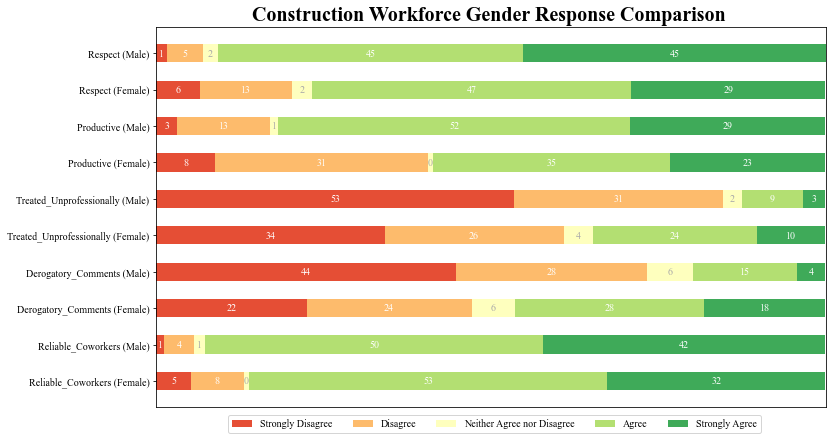

In [77]:
#Plot the results of Gender comparison in the RT370 survey
#The following code was adopter from https://matplotlib.org/3.3.3/gallery/index.html and modified to work with my data
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly Disagree', 'Disagree',
                  'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']

results=results_data_culture_gender_compare

def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.1, -0.08),
              loc='lower left', fontsize='medium')
    plt.title("Construction Workforce Gender Response Comparison ",
         fontsize=20,
        color="black", fontweight="bold")
    plt.rcParams["font.family"] = "Times New Roman"

    return fig, ax


survey(results, category_names)
plt.show()

In [65]:
#Drop Scale Column
results_data_culture=results_data_culture.drop(columns='Scale')

In [66]:
#Rename columns as follows to include the name of the workforce in RT370 data
results_data_culture=results_data_culture.rename(columns={"Respect": "Respect (Construction)", 
                                          "Productive": "Productive (Construction)", 
                                          "Treated_Unprofessionally": "Treated_Unprofessionally (Construction)", 
                                          "Derogatory_Comments": "Derogatory_Comments (Construction)", 
                                          "Reliable_Coworkers": "Reliable_Coworkers (Construction)"})
results_data_culture

,Respect (Construction),Productive (Construction),Treated_Unprofessionally (Construction),Derogatory_Comments (Construction),Reliable_Coworkers (Construction)
0,1.8,3.4,52.3,43.5,1.4
1,5.8,14.9,31.3,28.4,4.7
2,2.3,1.2,2.9,7,1.7
3,45.7,51.7,9.8,16.2,50.4
4,44.4,28.8,3.7,5,41.8


In [67]:
#Drop the scale column
results_data_GSS=results_data_GSS.drop(columns='Scale')

In [68]:
#Rename columns as follows to include the name of the workforce in GSS data
results_data_GSS=results_data_GSS.rename(columns={"Respect": "Respect (National)", 
                                          "Productive": "Productive (National)", 
                                          "Treated_Unprofessionally": "Treated_Unprofessionally (National)", 
                                          "Derogatory_Comments": "Derogatory_Comments (National)", 
                                          "Reliable_Coworkers": "Reliable_Coworkers (National)"})
results_data_GSS

,Respect (National),Productive (National),Treated_Unprofessionally (National),Derogatory_Comments (National),Reliable_Coworkers (National)
0,1.7,1.4,56.3,72.9,3.6
1,6.2,9.7,27.5,16,6.4
2,0,0.2,1.2,0,0.6
3,56.5,60.4,11.7,8.5,37.3
4,35.6,28.3,3.3,2.7,52.1


In [69]:
#Create a dataframe that alternates between Construction and National workforce of the results of 
#percentage of responses in each category in the likert scale.
results_data_culture_GSS_compare=pd.DataFrame([
                                        results_data_culture['Respect (Construction)'],
                                        results_data_GSS['Respect (National)'],
                                        results_data_culture['Productive (Construction)'],
                                        results_data_GSS['Productive (National)'],
                                        results_data_culture['Treated_Unprofessionally (Construction)'],
                                        results_data_GSS['Treated_Unprofessionally (National)'],
                                        results_data_culture['Derogatory_Comments (Construction)'],
                                        results_data_GSS['Derogatory_Comments (National)'],
                                        results_data_culture['Reliable_Coworkers (Construction)'],
                                        results_data_GSS['Reliable_Coworkers (National)'],
                                          ])
#Change from a dataframe to dictionary
results_data_culture_GSS_compare=results_data_culture_GSS_compare.T.to_dict(orient='list')
results_data_culture_GSS_compare

{'Respect (Construction)': [1.8, 5.8, 2.3, 45.7, 44.4],
 'Respect (National)': [1.7, 6.2, 0.0, 56.5, 35.6],
 'Productive (Construction)': [3.4, 14.9, 1.2, 51.7, 28.8],
 'Productive (National)': [1.4, 9.7, 0.2, 60.4, 28.3],
 'Treated_Unprofessionally (Construction)': [52.3, 31.3, 2.9, 9.8, 3.7],
 'Treated_Unprofessionally (National)': [56.3, 27.5, 1.2, 11.7, 3.3],
 'Derogatory_Comments (Construction)': [43.5, 28.4, 7.0, 16.2, 5.0],
 'Derogatory_Comments (National)': [72.9, 16.0, 0.0, 8.5, 2.7],
 'Reliable_Coworkers (Construction)': [1.4, 4.7, 1.7, 50.4, 41.8],
 'Reliable_Coworkers (National)': [3.6, 6.4, 0.6, 37.3, 52.1]}

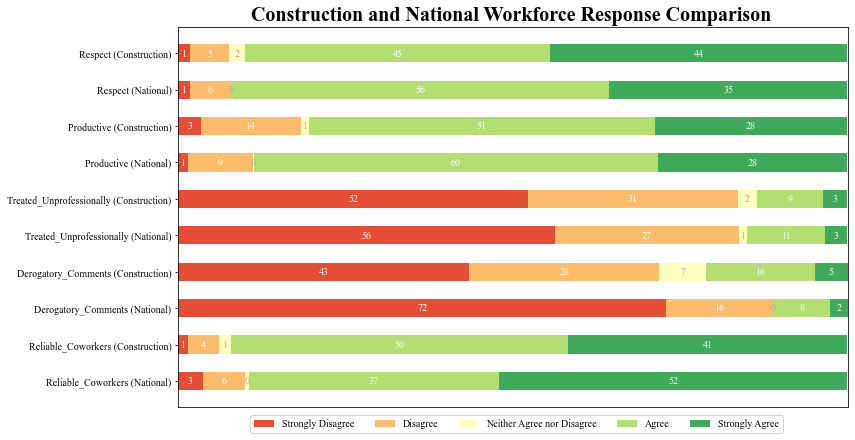

In [70]:
#Plot the results of Workforce comparison Between RT370 survey and GSS data
#The following code was adopter from https://matplotlib.org/3.3.3/gallery/index.html and modified to work with my data
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly Disagree', 'Disagree',
                  'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']

results=results_data_culture_GSS_compare

def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.1, -0.08),
              loc='lower left', fontsize='medium')
    plt.title("Construction and National Workforce Response Comparison ",
         fontsize=20,
        color="black", fontweight="bold")
    plt.rcParams["font.family"] = "Times New Roman"

    return fig, ax


survey(results, category_names)
plt.show()

In [71]:
#Drop the Scale Column
results_data_GSS_male=results_data_GSS_male.drop(columns='Scale')

In [72]:
#Rename the columns as follows to include MALE
results_data_GSS_male=results_data_GSS_male.rename(columns={"Respect": "Respect (Male)", 
                                          "Productive": "Productive (Male)", 
                                          "Treated_Unprofessionally": "Treated_Unprofessionally (Male)", 
                                          "Derogatory_Comments": "Derogatory_Comments (Male)", 
                                          "Reliable_Coworkers": "Reliable_Coworkers (Male)"})
results_data_GSS_male

,Respect (Male),Productive (Male),Treated_Unprofessionally (Male),Derogatory_Comments (Male),Reliable_Coworkers (Male)
0,1.2,1,56.7,67.7,2.8
1,6,10.6,29.7,18.7,6.3
2,0,0.3,0.9,0,0.7
3,56.5,61.7,9.7,10.4,38
4,36.4,26.4,3,3.2,52.2


In [73]:
#Drop the Scale Column
results_data_GSS_female=results_data_GSS_female.drop(columns='Scale')

In [74]:
#Rename the columns as follows to include FEMALE
results_data_GSS_female=results_data_GSS_female.rename(columns={"Respect": "Respect (Female)", 
                                          "Productive": "Productive (Female)", 
                                          "Treated_Unprofessionally": "Treated_Unprofessionally (Female)", 
                                          "Derogatory_Comments": "Derogatory_Comments (Female)", 
                                          "Reliable_Coworkers": "Reliable_Coworkers (Female)"})
results_data_GSS_female

,Respect (Female),Productive (Female),Treated_Unprofessionally (Female),Derogatory_Comments (Female),Reliable_Coworkers (Female)
0,2.2,1.7,55.9,78.1,4.4
1,6.5,8.8,25.2,13.3,6.5
2,0,0.2,1.6,0,0.5
3,56.5,59.2,13.7,6.5,36.7
4,34.8,30.1,3.7,2.2,52


In [75]:
#Create a dataframe that alternates between male and female of the results of percentage of responses in each category
#in the likert scale.
results_data_GSS_gender_compare=pd.DataFrame([
                                        results_data_GSS_male['Respect (Male)'],
                                        results_data_GSS_female['Respect (Female)'],
                                        results_data_GSS_male['Productive (Male)'],
                                        results_data_GSS_female['Productive (Female)'],
                                        results_data_GSS_male['Treated_Unprofessionally (Male)'],
                                        results_data_GSS_female['Treated_Unprofessionally (Female)'],
                                        results_data_GSS_male['Derogatory_Comments (Male)'],
                                        results_data_GSS_female['Derogatory_Comments (Female)'],
                                        results_data_GSS_male['Reliable_Coworkers (Male)'],
                                        results_data_GSS_female['Reliable_Coworkers (Female)'],
                                          ])

#Change from dataframe to dictionary
results_data_GSS_gender_compare=results_data_GSS_gender_compare.T.to_dict(orient='list')
results_data_GSS_gender_compare

{'Respect (Male)': [1.2, 6.0, 0.0, 56.5, 36.4],
 'Respect (Female)': [2.2, 6.5, 0.0, 56.5, 34.8],
 'Productive (Male)': [1.0, 10.6, 0.3, 61.7, 26.4],
 'Productive (Female)': [1.7, 8.8, 0.2, 59.2, 30.1],
 'Treated_Unprofessionally (Male)': [56.7, 29.7, 0.9, 9.7, 3.0],
 'Treated_Unprofessionally (Female)': [55.9, 25.2, 1.6, 13.7, 3.7],
 'Derogatory_Comments (Male)': [67.7, 18.7, 0.0, 10.4, 3.2],
 'Derogatory_Comments (Female)': [78.1, 13.3, 0.0, 6.5, 2.2],
 'Reliable_Coworkers (Male)': [2.8, 6.3, 0.7, 38.0, 52.2],
 'Reliable_Coworkers (Female)': [4.4, 6.5, 0.5, 36.7, 52.0]}

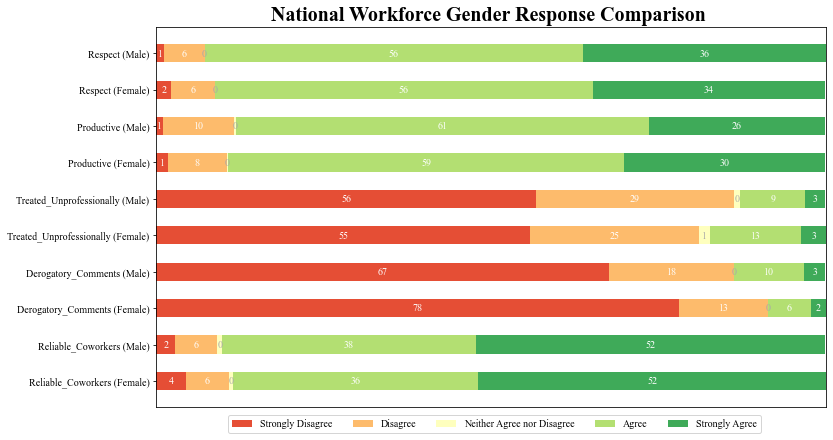

In [76]:
#Plot the results of Gender comparison in the GSS data
#The following code was adopter from https://matplotlib.org/3.3.3/gallery/index.html and modified to work with my data
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly Disagree', 'Disagree',
                  'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']

results=results_data_GSS_gender_compare

def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.1, -0.08),
              loc='lower left', fontsize='medium')
    plt.title("National Workforce Gender Response Comparison ",
         fontsize=20,
        color="black",fontweight="bold")
    plt.rcParams["font.family"] = "Times New Roman"
    

    return fig, ax


survey(results, category_names)
plt.show()